In [2]:
import numpy as np #for work in multidimensional array
import pandas as pd # organize data in tabular form and perfrom operations on the data
import scipy # numpy pandas matplotlib.pyplot is a part of this library
import statsmodels.api as sm
import matplotlib.pyplot as plt # 2d plotting library
import seaborn as sns
import sklearn
sns.set()

In [2]:
data = pd.read_csv("regression_1.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [4]:
data.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
y = data["GPA"]
x1 = data["SAT"]

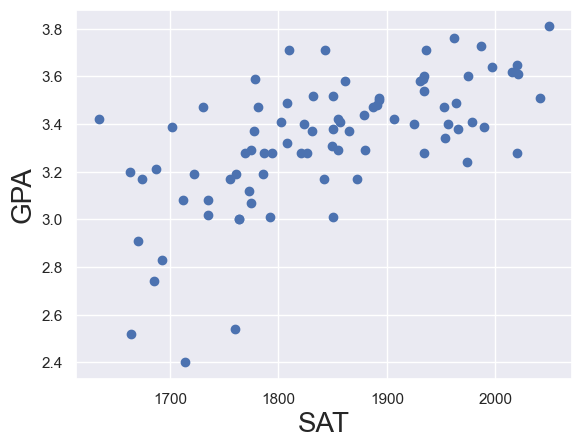

In [7]:
plt.scatter(x1,y)
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show();

In [8]:
x = sm.add_constant(x1)
results =sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           7.20e-11
Time:                        22:43:55   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

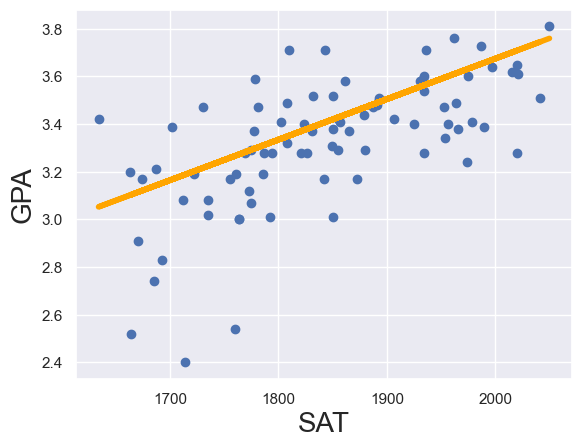

In [9]:
plt.scatter(x1,y)
yhat = 0.0017*x1 +0.275
fig = plt.plot(x1,yhat,lw = 4 , c ="orange",label = "regression line")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show();

# Now with SKLEARN or SCIKIT-LEARN

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [3]:
data1 = pd.read_csv("regression_1.csv")
data1.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [22]:
X= data1.drop("GPA",axis =1)
Y = data1["GPA"]

In [24]:
x_matrix = X.values.reshape(-1,1) 
X.shape


(84, 1)

In [25]:
Y.shape

(84,)

In [26]:
print(X)

     SAT
0   1714
1   1664
2   1760
3   1685
4   1693
..   ...
79  1936
80  1810
81  1987
82  1962
83  2050

[84 rows x 1 columns]


# fitting the data

In [31]:
reg.fit(x_matrix, Y)

LinearRegression()

# r score

In [32]:
reg.score(x_matrix,y)

0.40600391479679765

# cofficeinets

In [34]:
reg.coef_

array([0.00165569])

# intercept

In [35]:
reg.intercept_

0.275040299660279

# predection

In [39]:
new_data = pd.DataFrame(data=[1750,1730],columns=["SAT"])
reg.predict(new_data)

C:\Users\ag536\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.17249439, 3.13938063])

In [40]:
new_data["Predicted GPA"] = reg.predict(new_data)
new_data

C:\Users\ag536\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted GPA
0,1750,3.172494
1,1730,3.139381


 # plotting the data

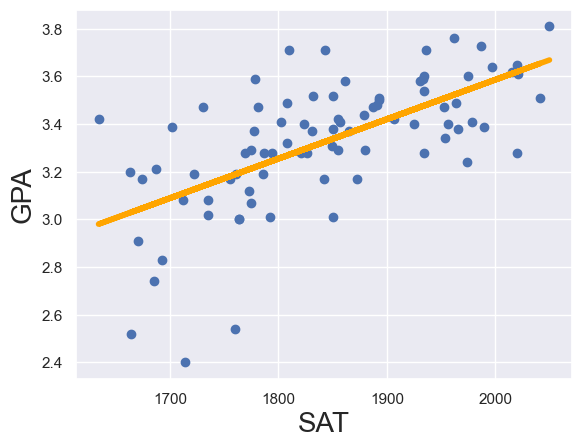

In [45]:
plt.scatter(X,y)
yhat = reg.intercept_ + reg.coef_*x_matrix
#yhat = 0.0017*x1 +0.275
fig = plt.plot(x_matrix,yhat,lw = 4 , c ="orange",label = "regression line")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show();